# Análise de Vendas de Produtos no Wish

Você foi contratado por uma empresa que planeja revender produtos no Wish. Seu objetivo vai ser ajudá-los a entender que fatores são os mais importantes para definir o sucesso de determinados produtos dentro da plataforma. Utilize as ferramentas estudadas até aqui para tirar insights e auxiliar a empresa do ponto de vista estratégico.

https://www.kaggle.com/datasets/jmmvutu/summer-products-and-sales-in-ecommerce-wish

### Perguntas possíveis

- Produtos com maior discrepância entre preço real e de retail vendem mais?
- Ad boost aumentam as vendas?
- Avaliações melhores aumentam vendas?
- Badges importam?
- Quantidade de tags auxiliam vendas?
- Tags com maiores vendas?
- Shipping analysis

# 0.0 Imports

In [ ]:
import pandas  as pd
import seaborn as sns
import shap

from matplotlib              import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble        import RandomForestClassifier
from sklearn.metrics         import classification_report, confusion_matrix

from wordcloud               import WordCloud, STOPWORDS

## 0.1 Load Dataset

In [ ]:
df = pd.read_csv('/content/summer-products-with-rating-and-performance_2020-08.csv')

In [ ]:
df.head(2)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08


## 0.2 Helper Functions

# 1.0 Data Description

In [ ]:
df1 = df.copy()

## 1.1 Data Dimension

In [ ]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 1573
Number of Columns: 43


## 1.2 Data Types

In [ ]:
df1.dtypes

title                            object
title_orig                       object
price                           float64
retail_price                      int64
currency_buyer                   object
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
rating_five_count               float64
rating_four_count               float64
rating_three_count              float64
rating_two_count                float64
rating_one_count                float64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
tags                             object
product_color                    object
product_variation_size_id        object
product_variation_inventory       int64
shipping_option_name             object
shipping_option_price             int64
shipping_is_express               int64


## 1.3 Selecting Data

In [ ]:
df1_products = df1.copy()

In [ ]:
df1.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [ ]:
cols = ['title_orig', 'price', 'retail_price',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count','badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory',  'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'merchant_rating_count', 'merchant_rating','origin_country']

df1_products = df1_products[cols]

## 1.3 Check NaN's

In [ ]:
df1_products.isna().sum()

title_orig                        0
price                             0
retail_price                      0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    41
product_variation_size_id        14
product_variation_inventory       0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner             1100
merchant_rating_count             0
merchant_rating                   0
origin_country                   17
dtype: int64

## 1.4 Fillout NaNs

In [ ]:
df1_products.loc[df1_products['product_color'].isna(), 'product_color'] = ''
df1_products.loc[df1_products['product_variation_size_id'].isna(), 'product_variation_size_id'] = ''
df1_products.loc[df1_products['origin_country'].isna(), 'origin_country'] = ''
df1_products.loc[df1_products['has_urgency_banner'].isna(), 'has_urgency_banner'] = '0'

## 1.5 Descriptive Statistical

In [ ]:
num_attributes = df1_products.select_dtypes(include = ['int64','float64','int32'])
cat_attributes = df1_products.select_dtypes(exclude = ['int64','float64','int32','datetime64[ns]'])

In [ ]:
cat_attributes.columns

Index(['title_orig', 'tags', 'product_color', 'product_variation_size_id',
       'has_urgency_banner', 'origin_country'],
      dtype='object')

## 1.6 Categorical Analysis

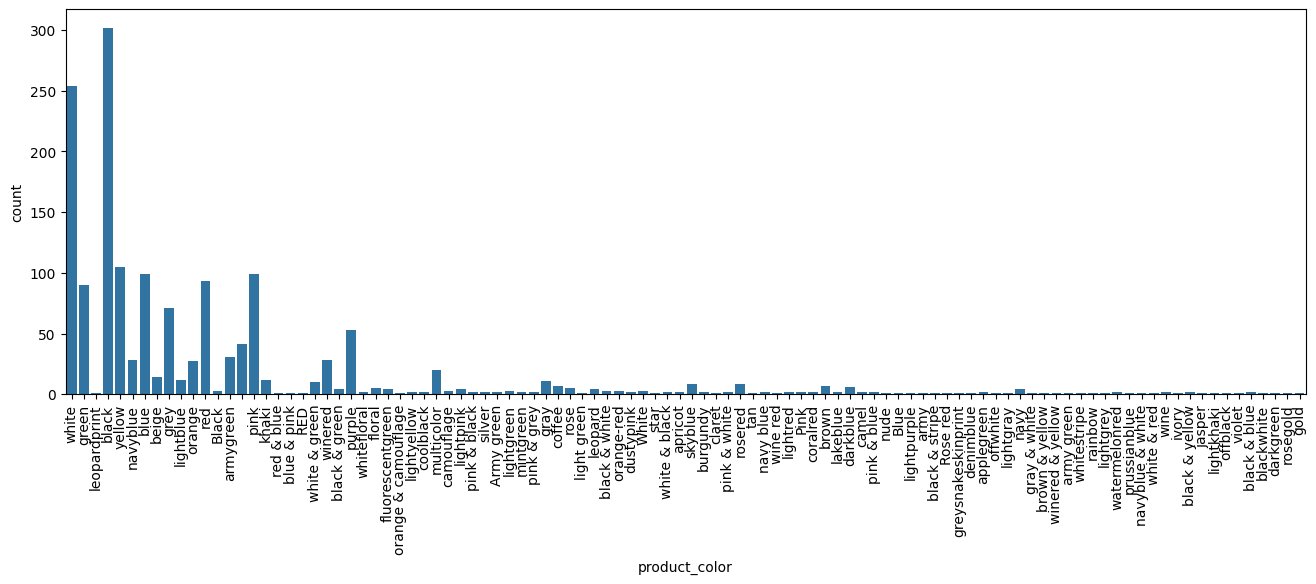

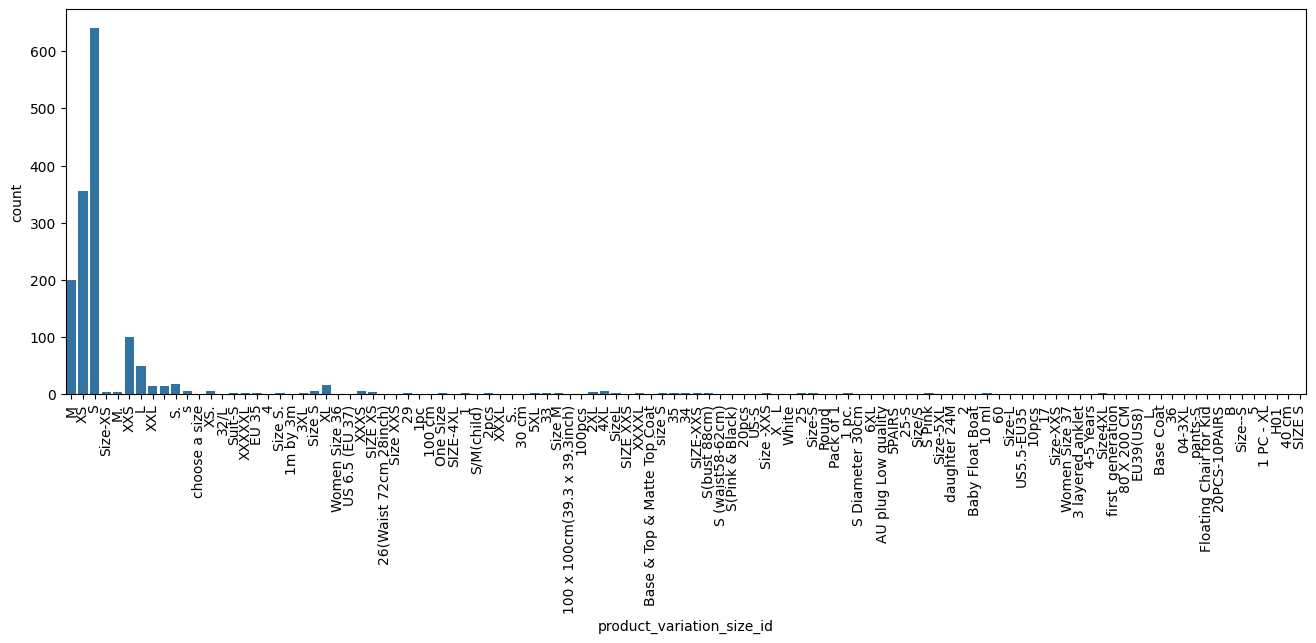

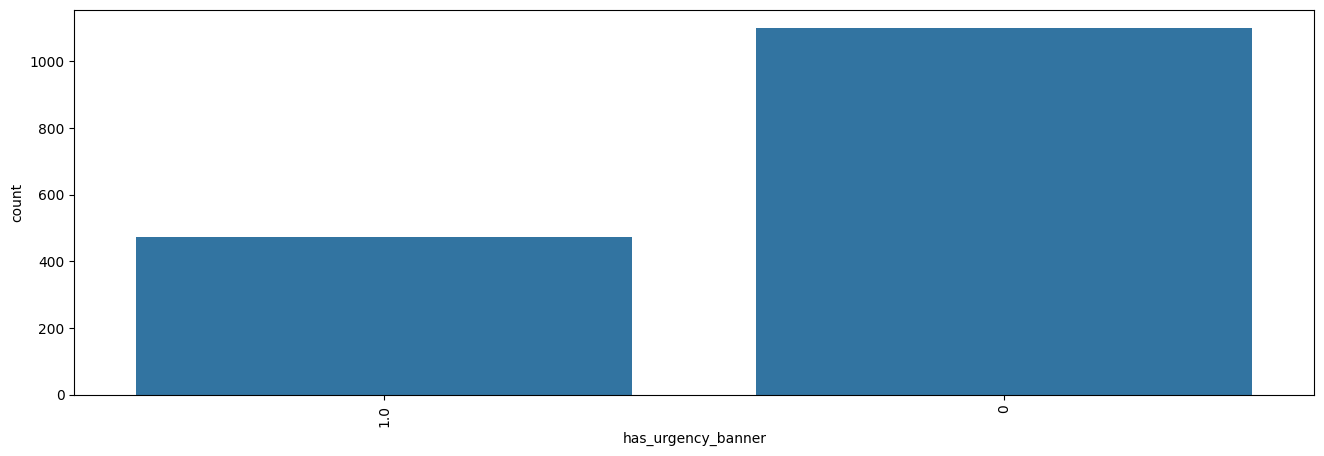

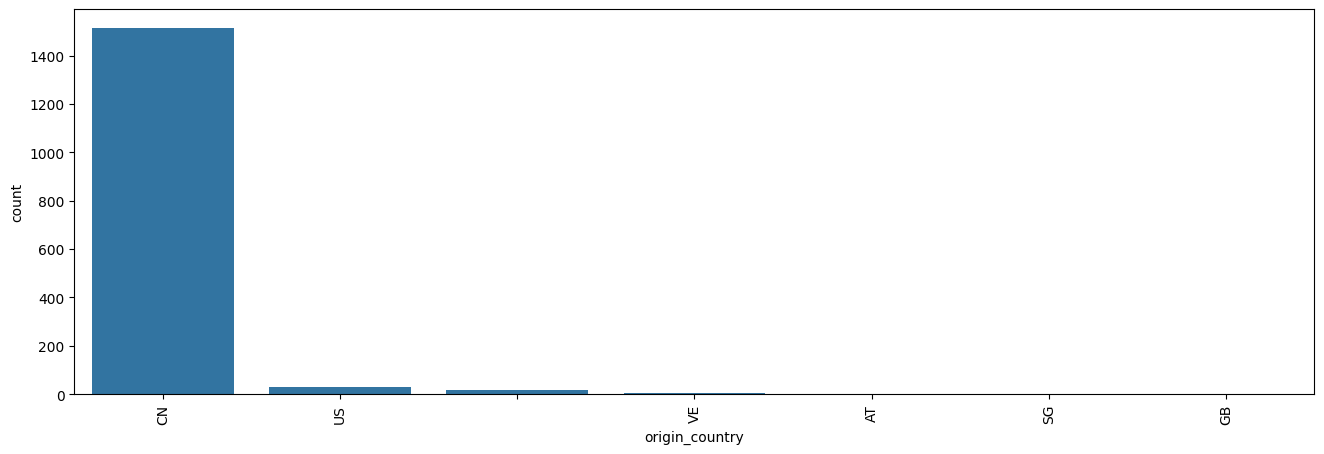

In [ ]:
for col in cat_attributes:
  if col not in ['title_orig', 'tags']:
      fig = plt.figure(figsize=(16, 5))
      ax = fig.add_subplot(111)
      sns.countplot(x=col, data=df1_products, ax=ax)
      plt.xticks(rotation=90)
      plt.show()

## 1.7 Numerical Analysis

In [ ]:
num_attributes.columns

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping',
       'product_variation_inventory', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'merchant_rating_count',
       'merchant_rating'],
      dtype='object')

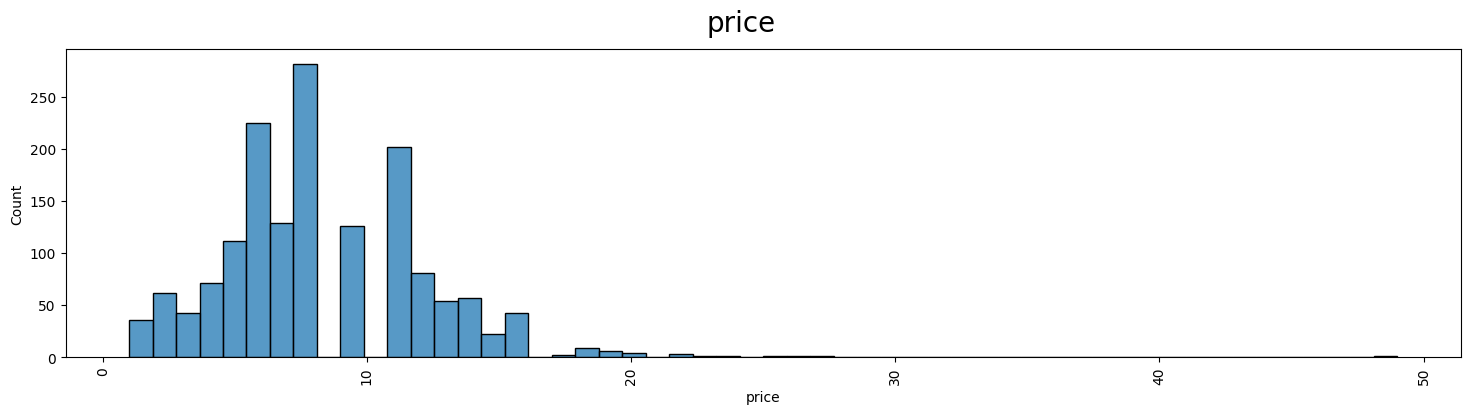

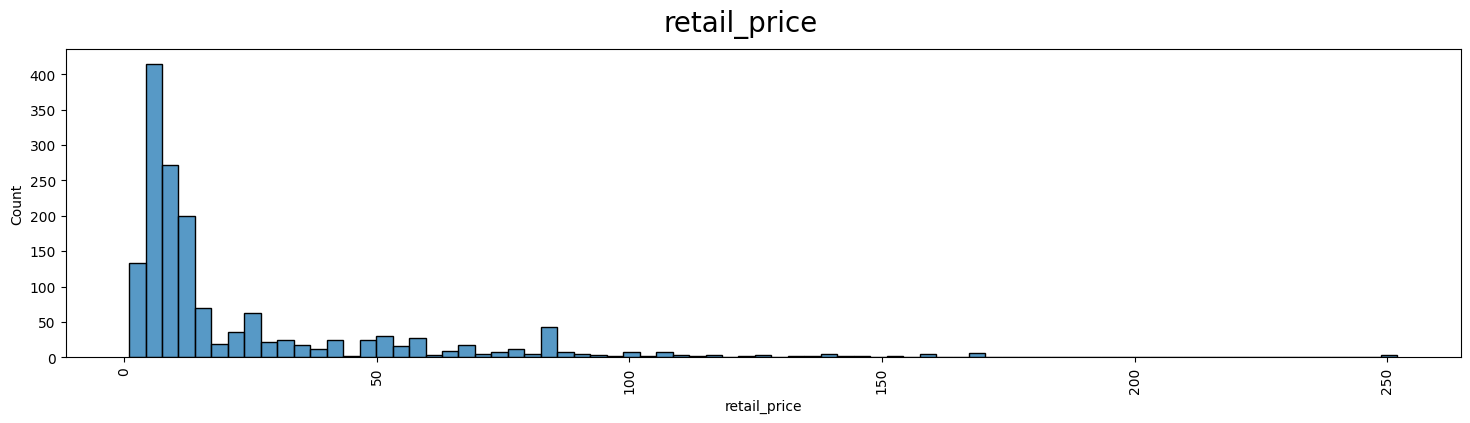

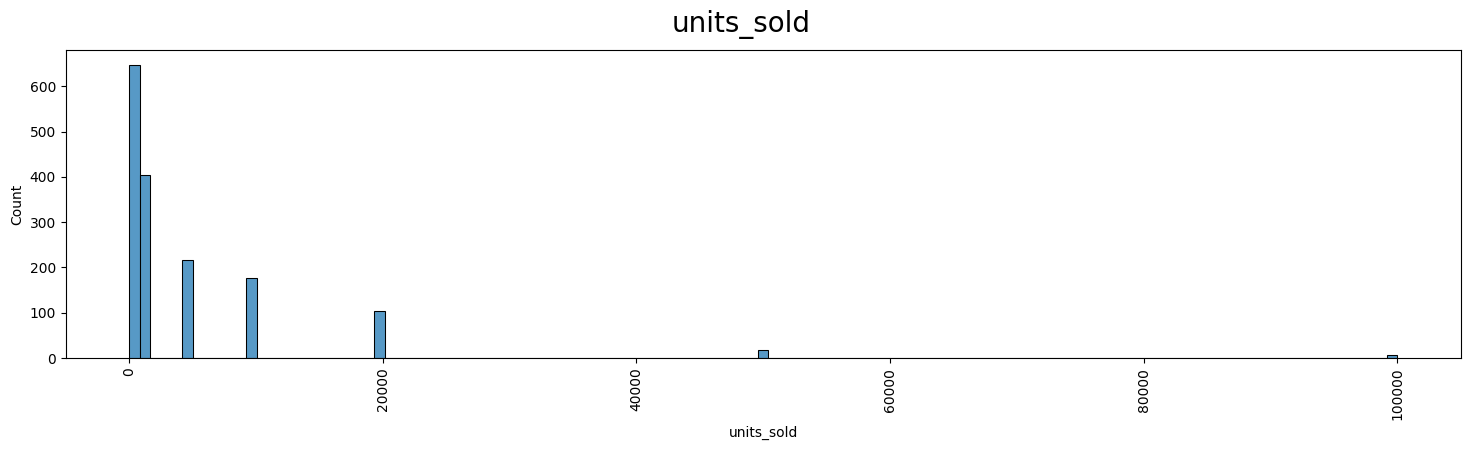

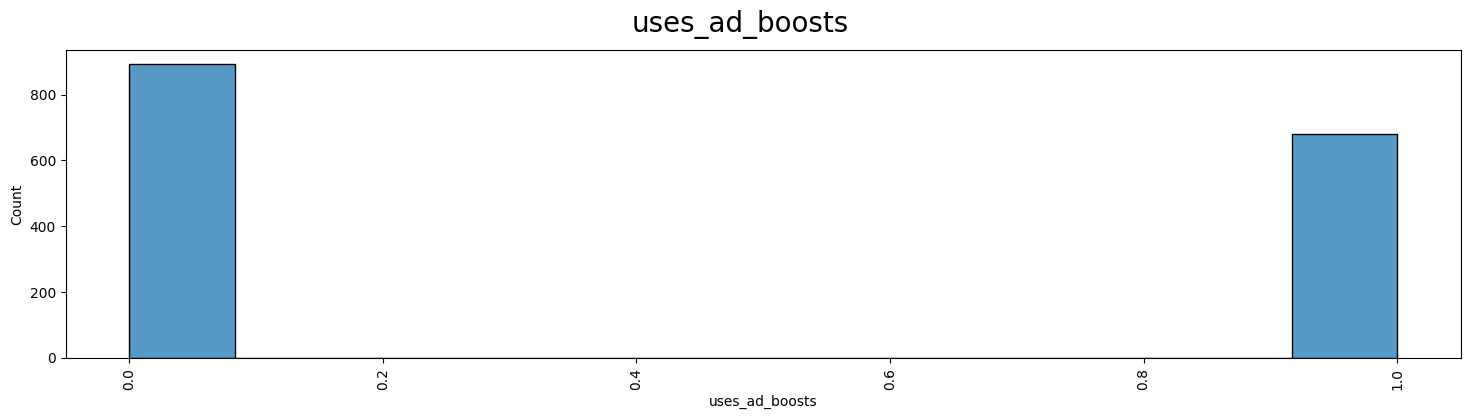

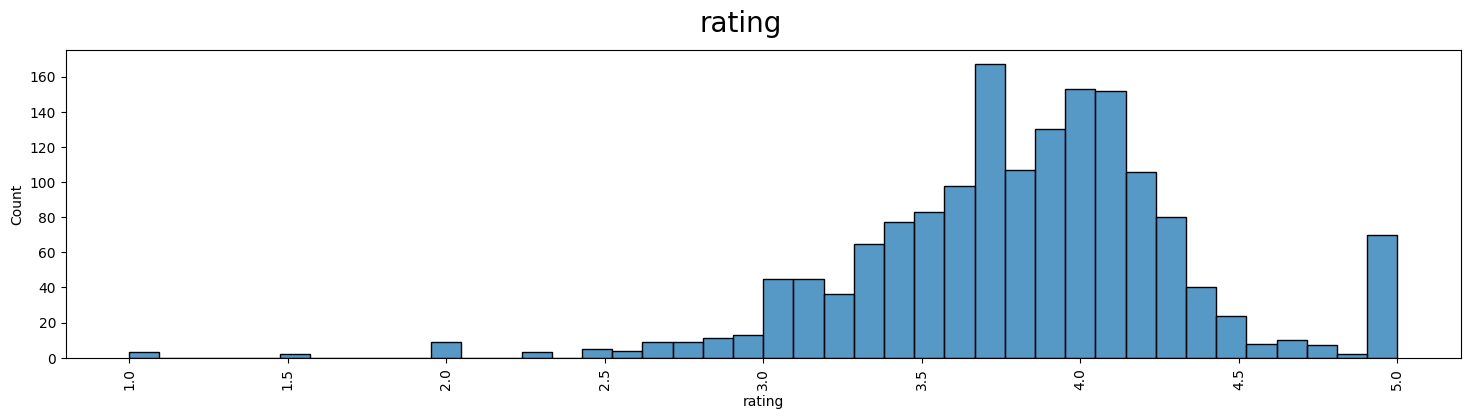

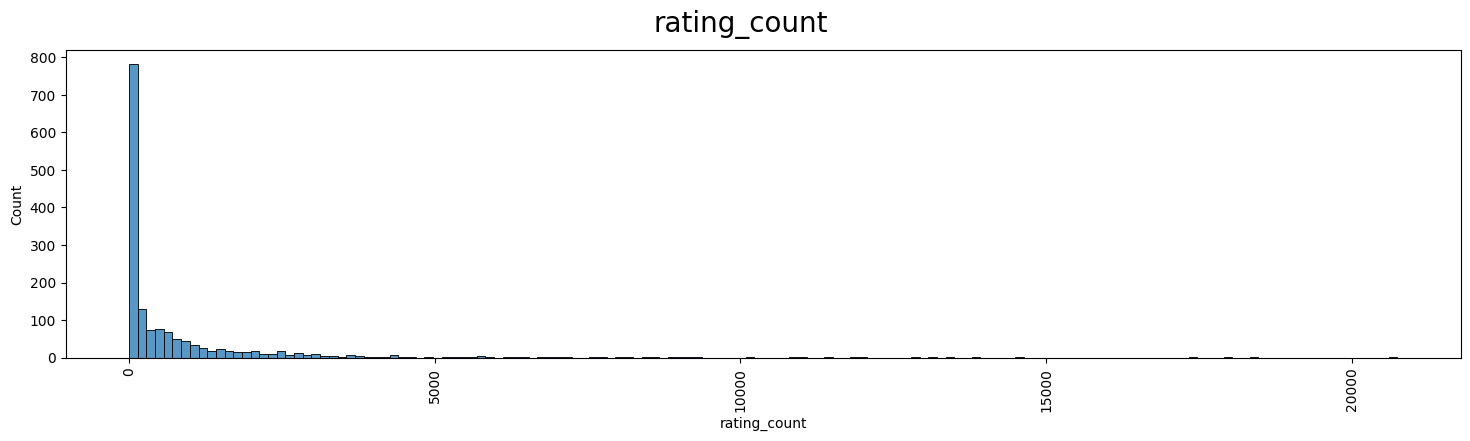

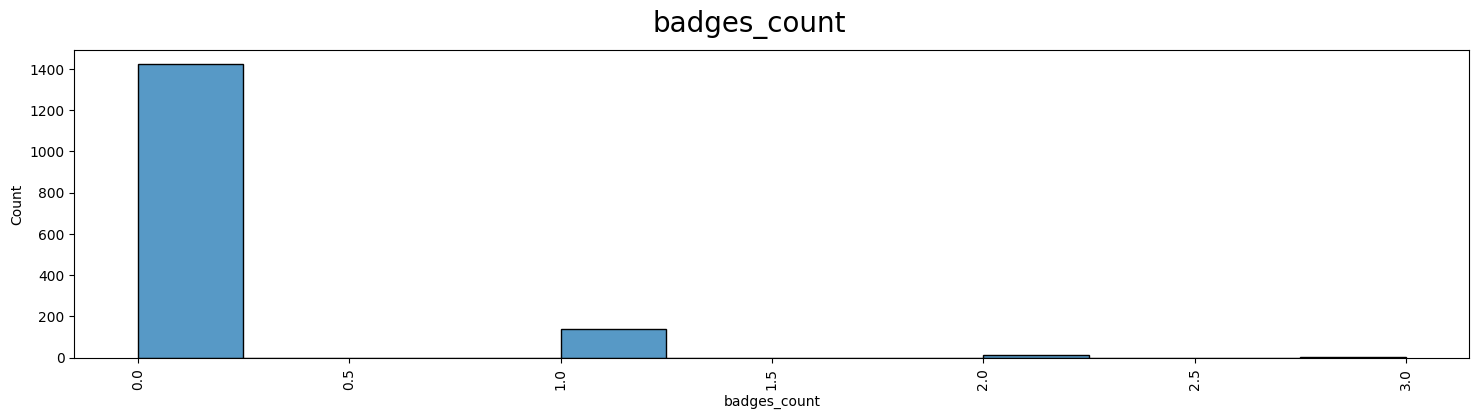

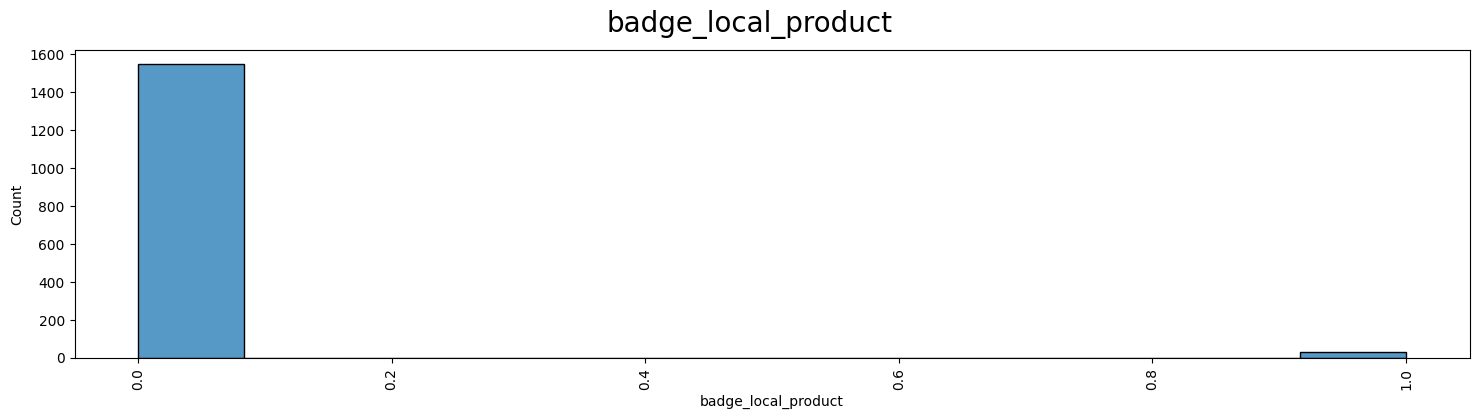

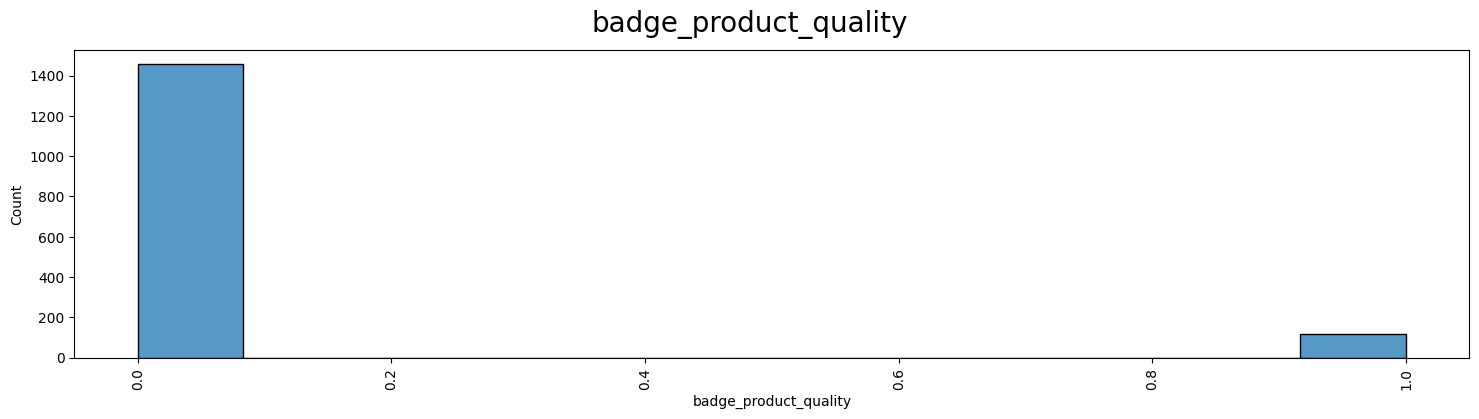

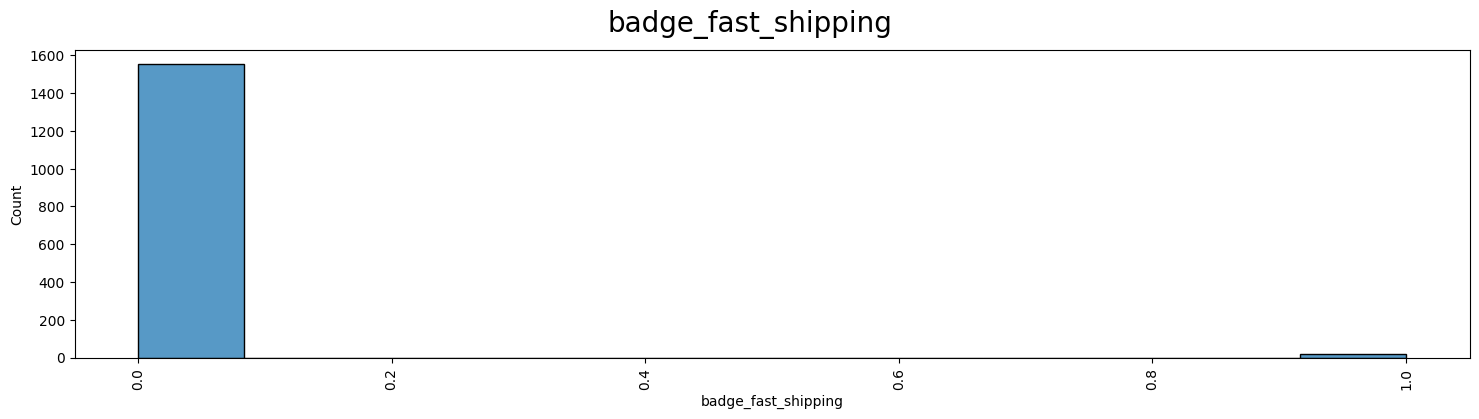

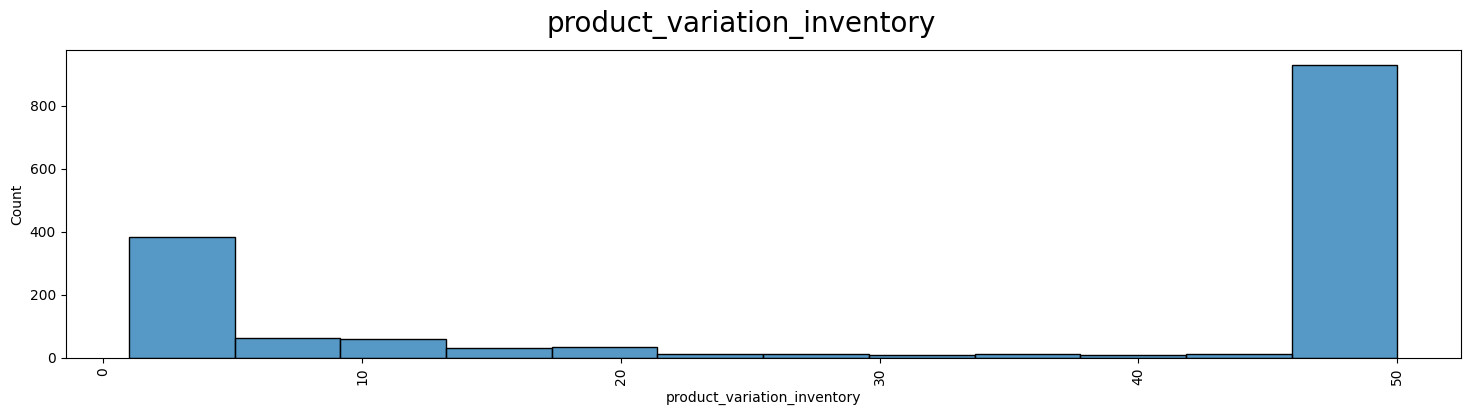

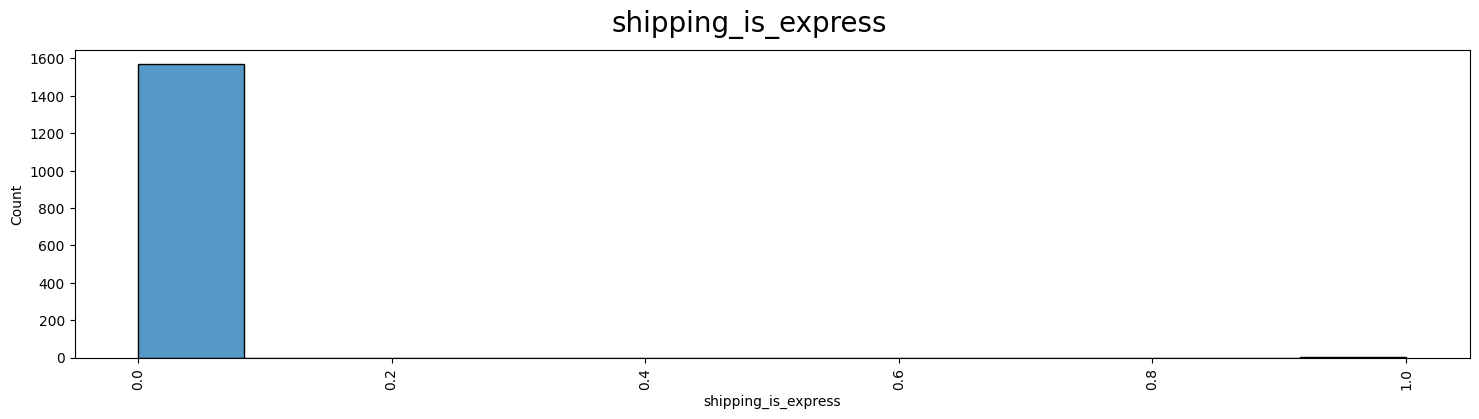

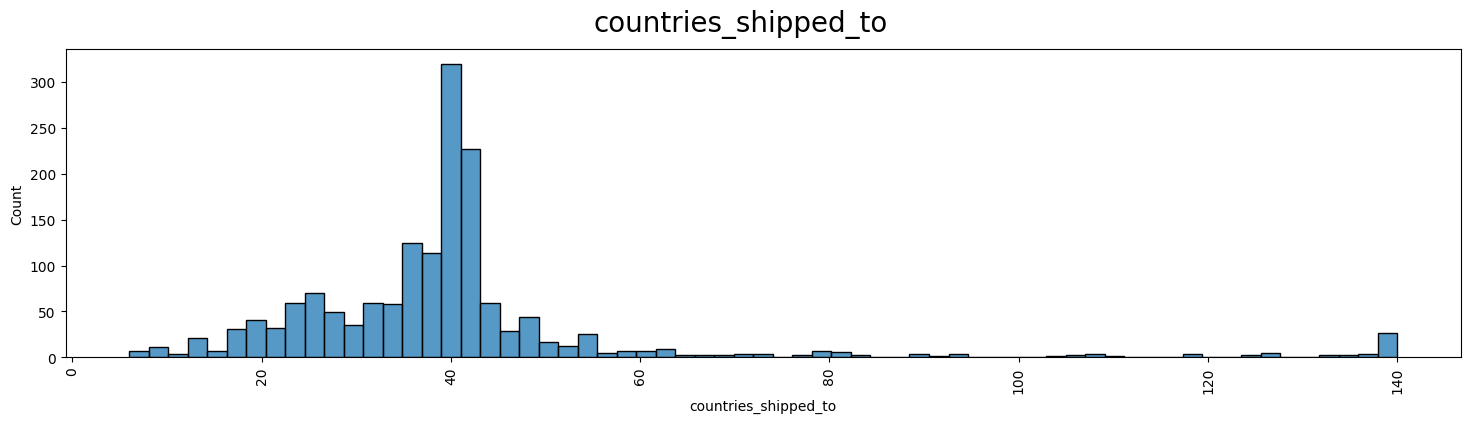

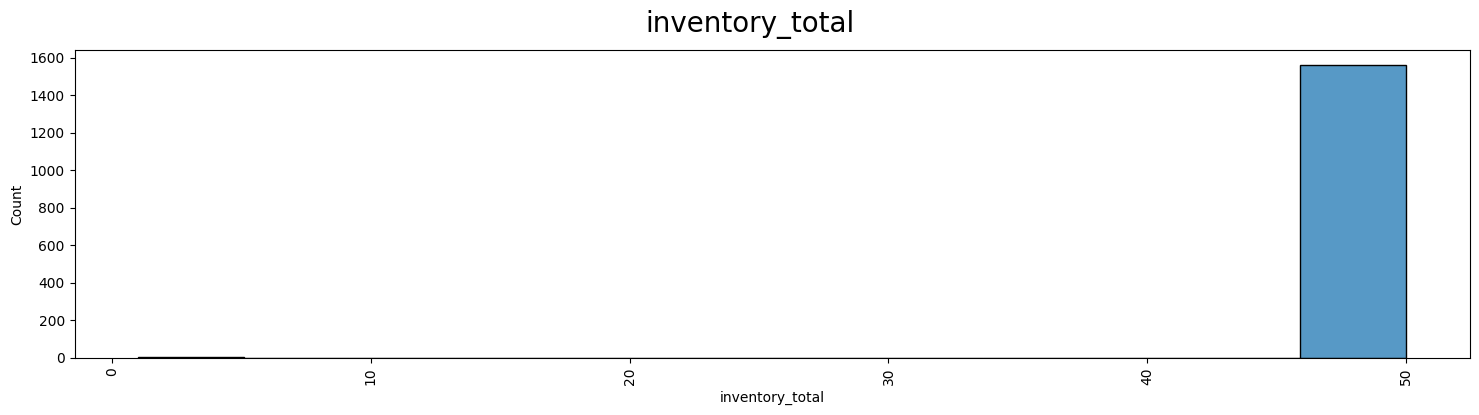

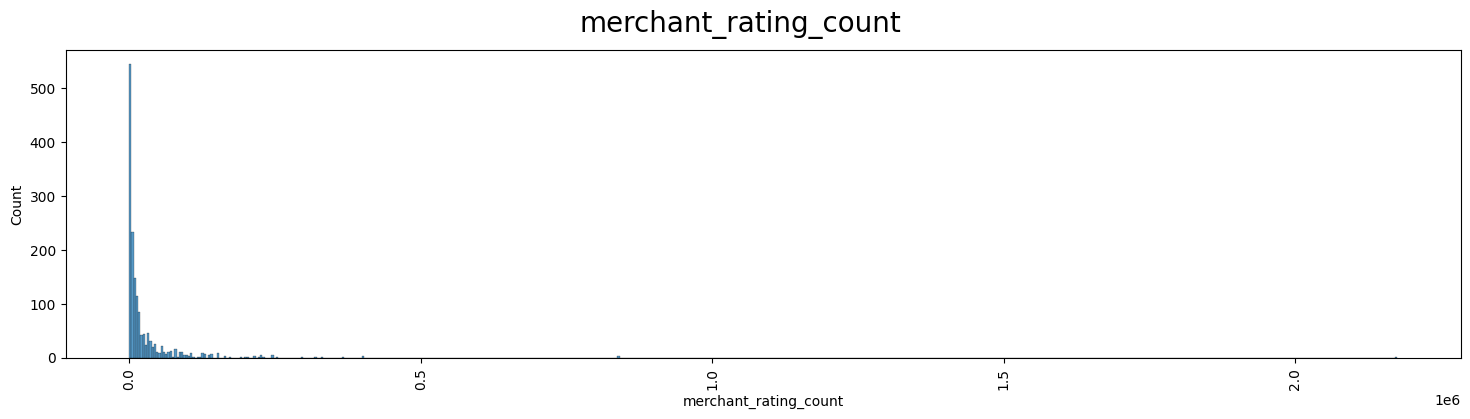

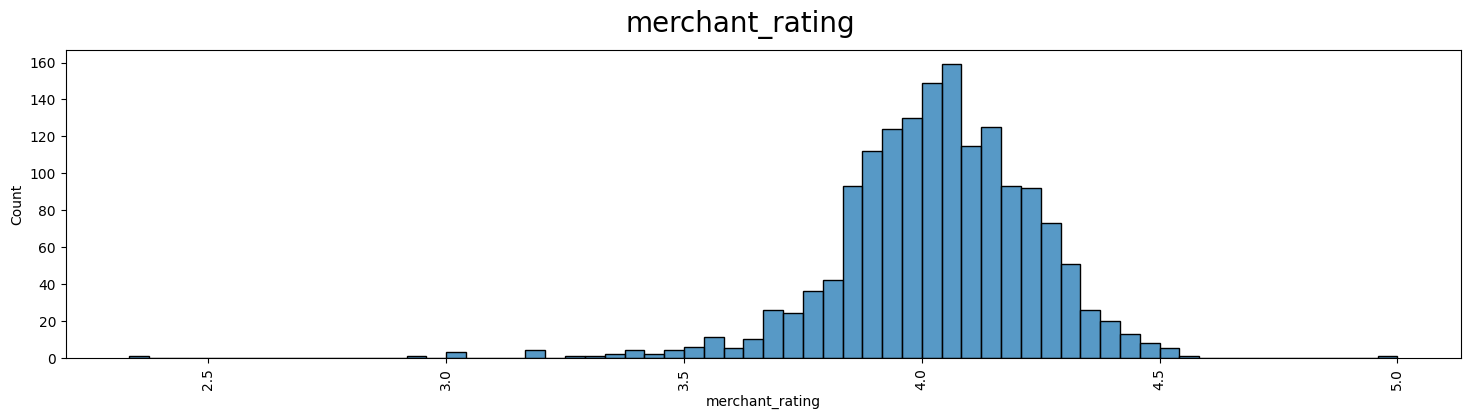

In [ ]:
for col in num_attributes:
  f, axes = plt.subplots(1,1, figsize=(18, 4))
  sns.histplot(x=col, data=df1_products)
  plt.xticks(rotation=90)
  plt.suptitle(col, fontsize=20)
  plt.show()

In [ ]:
df1_products.loc[df1_products['units_sold'] < 0, 'units_sold'] = 10
df1_products['units_sold'].value_counts()

units_sold
100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         49
50000      17
100000      6
8           4
1           3
7           2
2           2
3           2
6           1
Name: count, dtype: int64

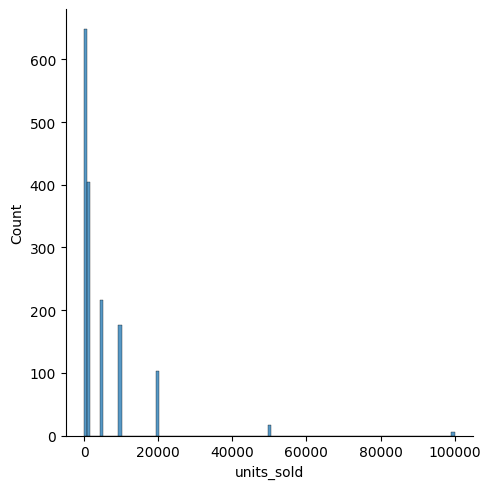

In [ ]:
sns.displot(x='units_sold', data=df1_products)

<Axes: xlabel='units_sold', ylabel='Count'>

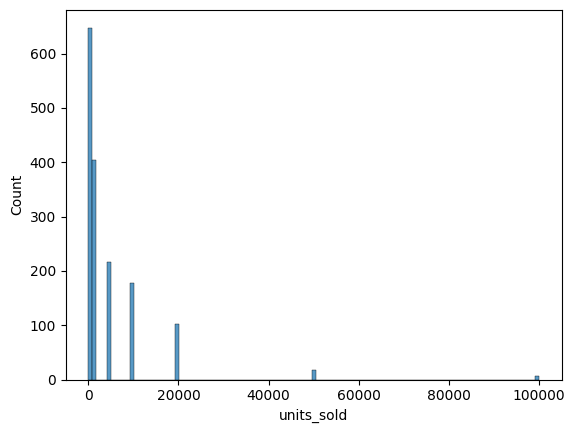

In [ ]:
sns.histplot(x='units_sold', data=df1_products)

In [ ]:
df1_products['units_sold'].median()

1000.0

In [ ]:
df1_products['units_sold'].mean()

4339.005085823268

## 1.8 The 'TAG' Column

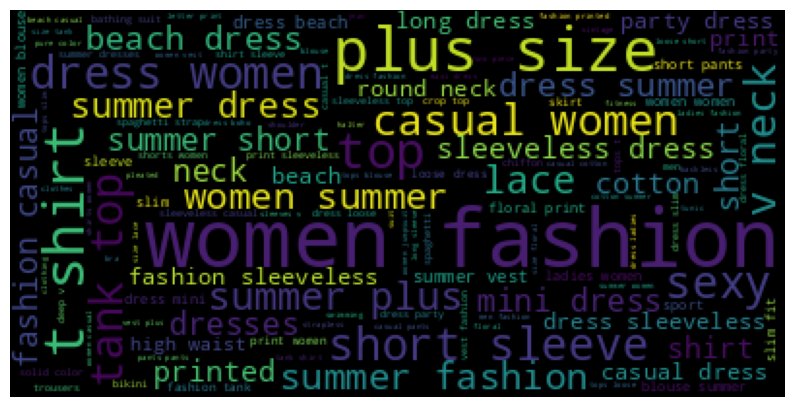

In [ ]:
word_string = ' '.join(df1_products['tags'].str.lower())
wordcloud = WordCloud (stopwords=STOPWORDS).generate(word_string)

plt.subplots(figsize=(10,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 1.9 The 'Success' products

In [ ]:
# definindo o 'income'
df1_products['income']= df1_products['price'] * df1_products['units_sold']
df1_products['income'].median()

7000.0

In [ ]:
# criando a variavel 'success'
df1_products['success'] = 0
df1_products.loc[df1_products['income'] > 7000, 'success'] = 1

In [ ]:
# conferindo os produtos campeões
df1_products['success'].value_counts()

success
0    809
1    764
Name: count, dtype: int64

# 2.0 Manager Questions

In [ ]:
df2_products = df1_products.copy()

## 2.1 Produtos com maior diferenças entre 'Retail_Price' e 'Price' vendem mais ?
R - Os produtos ainda estão parecidos, mas existe uma leve tendência que quanto maior o desconto maior são as chances de insucesso.

In [ ]:
df2_products['discount'] = df2_products['retail_price'] - df2_products['price']

<ipython-input-45-bb4e13badad0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2_products.loc[df2_products['success'] == 1, 'discount'], label='1')
<ipython-input-45-bb4e13badad0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2_products.loc[df2_products['success'] == 0, 'discount'], lab

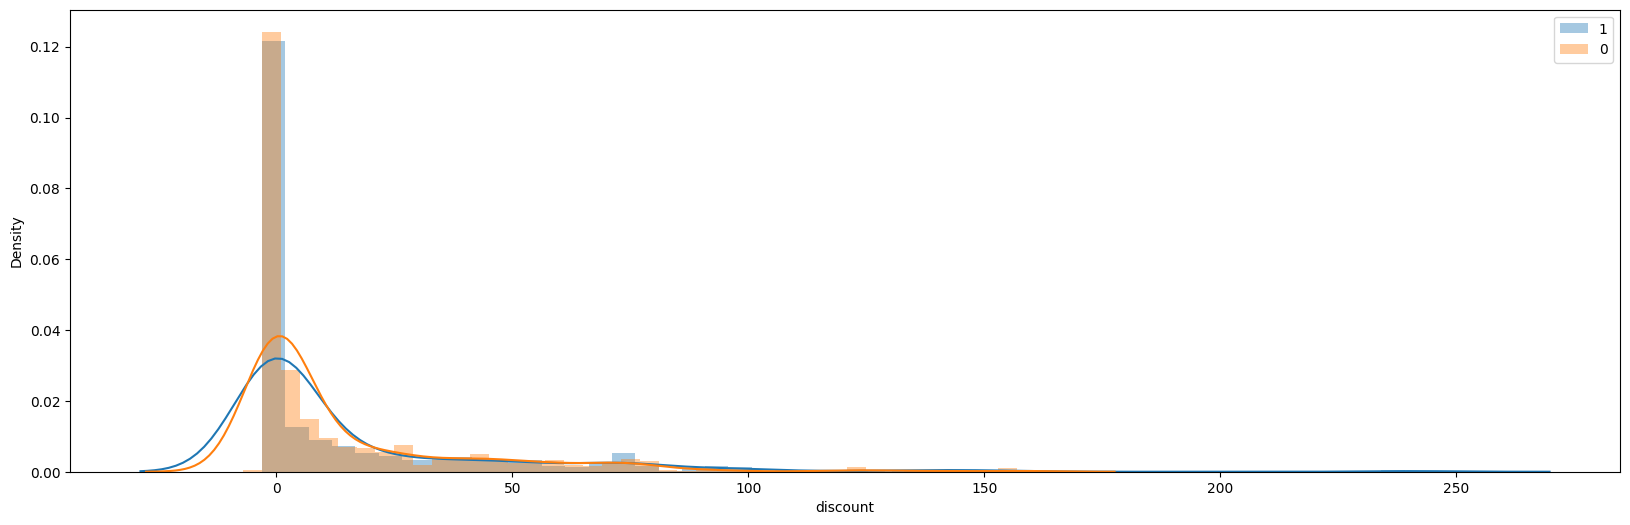

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
sns.distplot(df2_products.loc[df2_products['success'] == 1, 'discount'], label='1')
sns.distplot(df2_products.loc[df2_products['success'] == 0, 'discount'], label='0')
plt.legend()
plt.show()



## 2.2 AD Booster aumentam as vendas ?
R - Cerca de 60% dos produtos que tem sucesso, não usam AD Booster

In [ ]:
# conferindo produtos que usam AD BOOSTS
df2_products['uses_ad_boosts'].value_counts()

uses_ad_boosts
0    892
1    681
Name: count, dtype: int64

In [ ]:
# produtos que não tiveram sucesso
df2_products.loc[df2_products['success'] == 0, 'uses_ad_boosts'].value_counts()

uses_ad_boosts
0    441
1    368
Name: count, dtype: int64

In [ ]:
# produtos que tiveram sucesso
df2_products.loc[df2_products['success'] == 1, 'uses_ad_boosts'].value_counts()

uses_ad_boosts
0    451
1    313
Name: count, dtype: int64

## 2.3 Avaliaçãos melhoram as vendas ?
R - Sim, os produtos que tem sucesso são avaliados com 3.9 e tendem a vender mais !

<ipython-input-58-03456c388811>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2_products.loc[df2_products['success'] == 1, 'rating'], label='1')
<ipython-input-58-03456c388811>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2_products.loc[df2_products['success'] == 0, 'rating'], label='

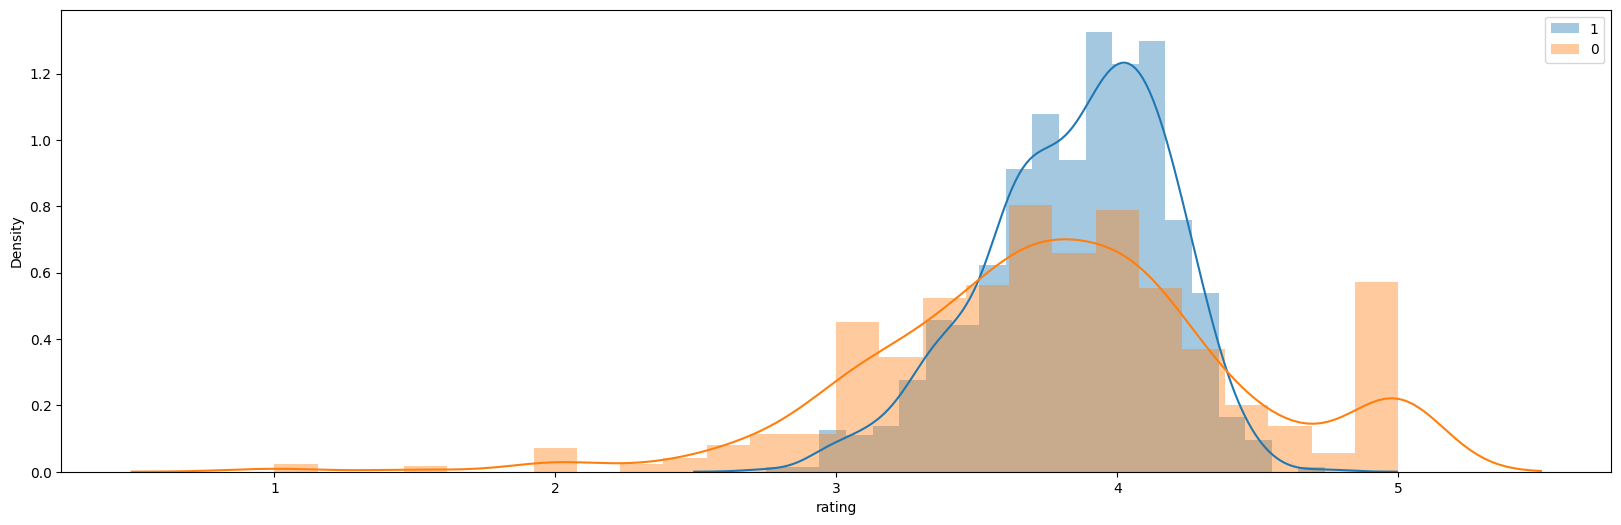

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
sns.distplot(df2_products.loc[df2_products['success'] == 1, 'rating'], label='1')
sns.distplot(df2_products.loc[df2_products['success'] == 0, 'rating'], label='0')
plt.legend()
plt.show()

In [ ]:
# conferindo a media e a mediana de produtos que foram sucesso a partir da avaliação
media_rating = df2_products.loc[df2_products['success'] == 1, 'rating'].mean()
mediana_rating = df2_products.loc[df2_products['success'] == 1, 'rating'].median()

print('A média de produtos com sucesso em avaliação é de:{}'.format(media_rating))
print('A mediana de produtos com sucesso em avaliação é de:{}'.format(mediana_rating))

A média de produtos com sucesso em avaliação é de:3.853625654450262
A mediana de produtos com sucesso em avaliação é de:3.9


In [ ]:
media_sem_sucesso_rating = df2_products.loc[df2_products['success'] == 0, 'rating'].mean()
mediana_sem_sucesso_rating = df2_products.loc[df2_products['success'] == 0, 'rating'].median()

print('A média de produtos sem sucesso em avaliação é de:{}'.format(media_sem_sucesso_rating))
print('A mediana de produtos sem sucesso em avaliação é de:{}'.format(mediana_sem_sucesso_rating))



A média de produtos sem sucesso em avaliação é de:3.789987639060569
A mediana de produtos sem sucesso em avaliação é de:3.78


## 2.4 As Badges são importantes ?
R - As Badges não são fatores que importantes quando o quesito é vendas e sucesso !

In [ ]:
df2_products.groupby(['success','badges_count']).count()[['title_orig']].pivot_table(index='success', columns='badges_count')

title_orig                
badges_count          0     1    2    3
success                                
0                 753.0  48.0  8.0  NaN
1                 669.0  90.0  3.0  2.0

## 2.5 Quantidade de Tags auxiliam nas vendas ?
R - Sim, os produtos que mais vendem tendem a ter mais Tags

In [ ]:
# separando as tags por virgulas
df2_products['tags_count'] = df2_products['tags'].apply(lambda x: len(x.split(',')))

<ipython-input-75-7ae63e6f0cd2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2_products.loc[df2_products['success'] == 1, 'tags_count'], label='1')
<ipython-input-75-7ae63e6f0cd2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2_products.loc[df2_products['success'] == 0, 'tags_count'],

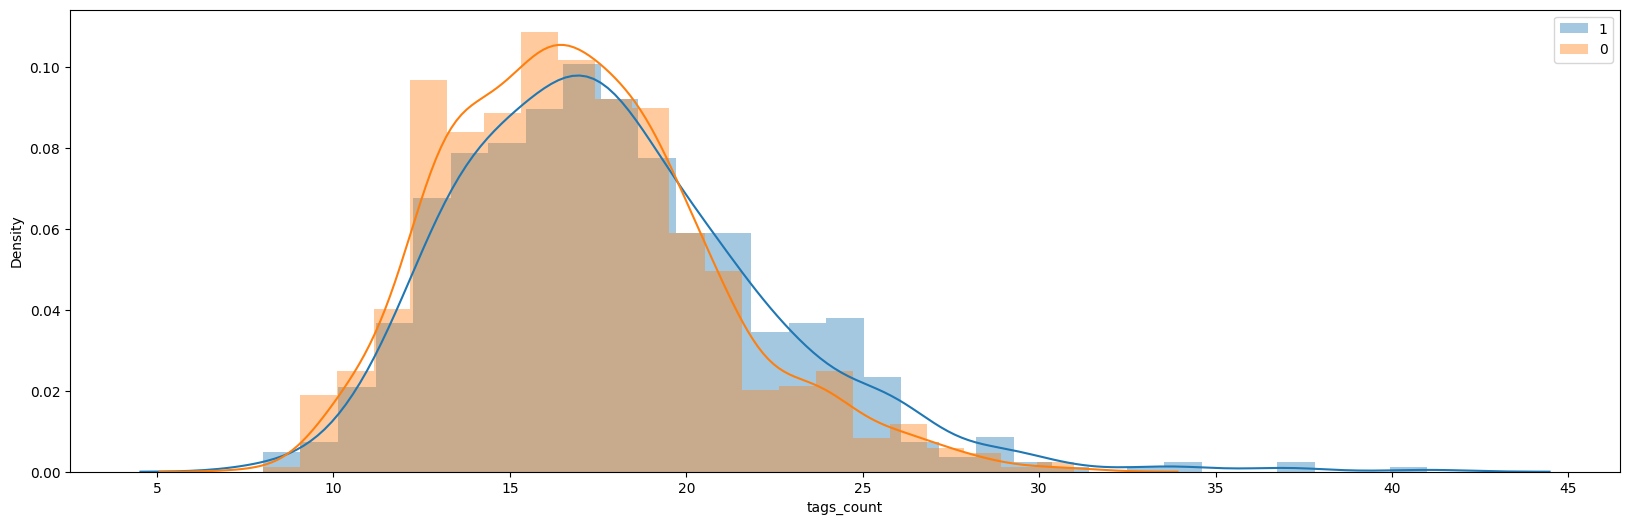

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
sns.distplot(df2_products.loc[df2_products['success'] == 1, 'tags_count'], label='1')
sns.distplot(df2_products.loc[df2_products['success'] == 0, 'tags_count'], label='0')
plt.legend()
plt.show()

# 3.0 Machine Learning

In [ ]:
df3 = df2_products.copy()

In [ ]:
# selecionando as colunas que serão utilizadas

model_cols = ['price','retail_price','uses_ad_boosts','rating', 'badges_count', 'badge_product_quality','badge_fast_shipping',
              'product_variation_inventory','shipping_is_express','countries_shipped_to','inventory_total' ,'has_urgency_banner',
              'merchant_rating','discount', 'tags_count']

In [ ]:
# divindo entre treino e teste
x = df3[model_cols]
y = df3['success']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
param_grid = [
    {'n_estimators':[3, 10, 30], 'max_features':[2, 4, 6, 8]},
    {'bootstrap':[False], 'n_estimators':[3, 10], 'max_features':[2, 3, 4]}
]

forest_reg = RandomForestClassifier()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True)

In [ ]:
# conferindo os melhores parametros
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [ ]:
# definição do melhor modelo
rf_model = grid_search.best_estimator_

In [ ]:
# plotando as previsões
y_pred = rf_model.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       248
           1       0.73      0.70      0.72       224

    accuracy                           0.74       472
   macro avg       0.73      0.73      0.73       472
weighted avg       0.73      0.74      0.73       472

[[190  58]
 [ 67 157]]


<Axes: >

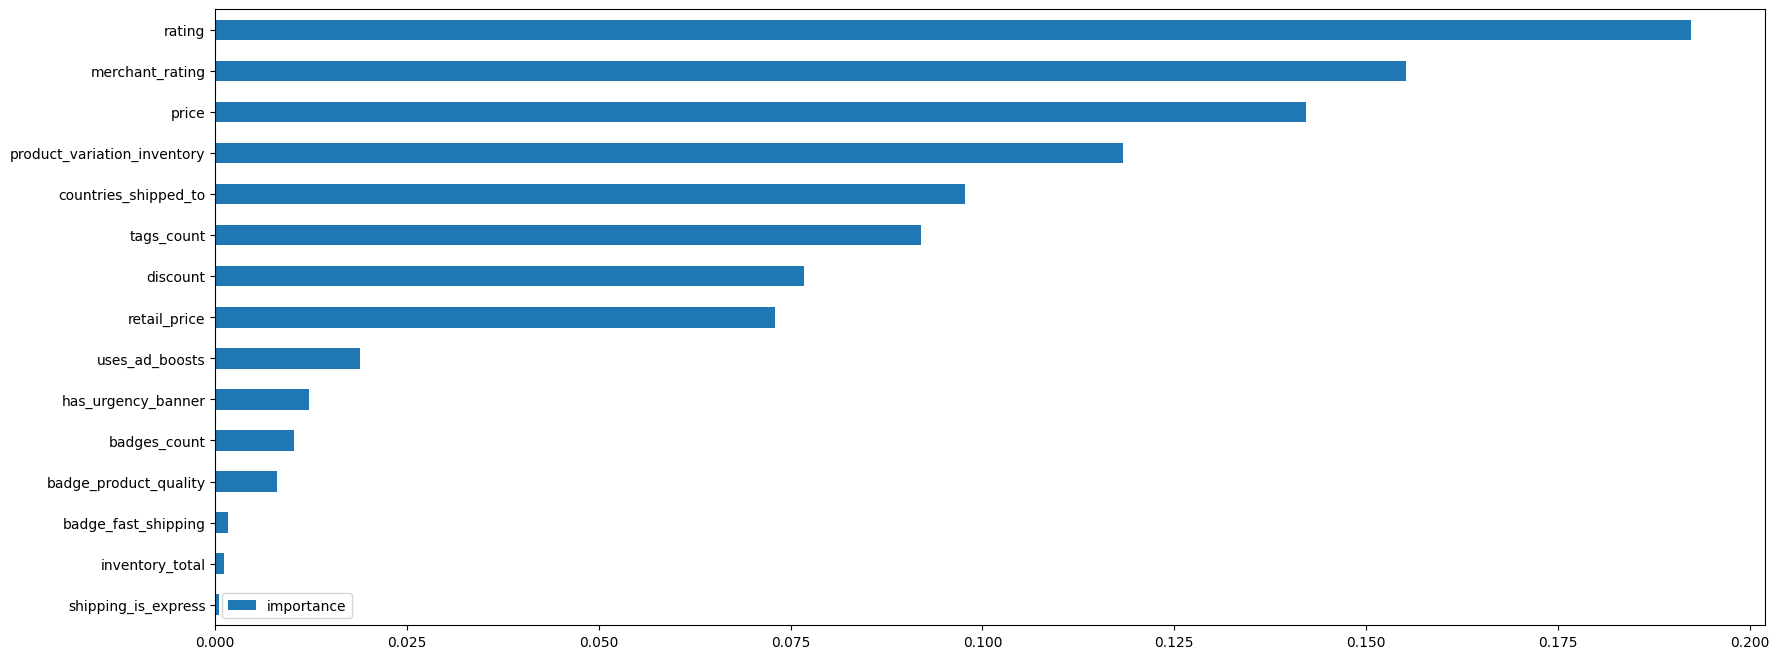

In [ ]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = x.columns,
                                    columns=['importance']).sort_values('importance',ascending=True)

fig, ax = plt.subplots(figsize=(20,8))
feature_importances.plot(kind='barh', ax=ax)

In [ ]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(x)

# Imprime as formas (shapes) para verificar
print("Shape de shap_values:", shap_values.shape)
print("Shape de x:", x.shape)

Shape de shap_values: (1573, 15, 2)
Shape de x: (1573, 15)


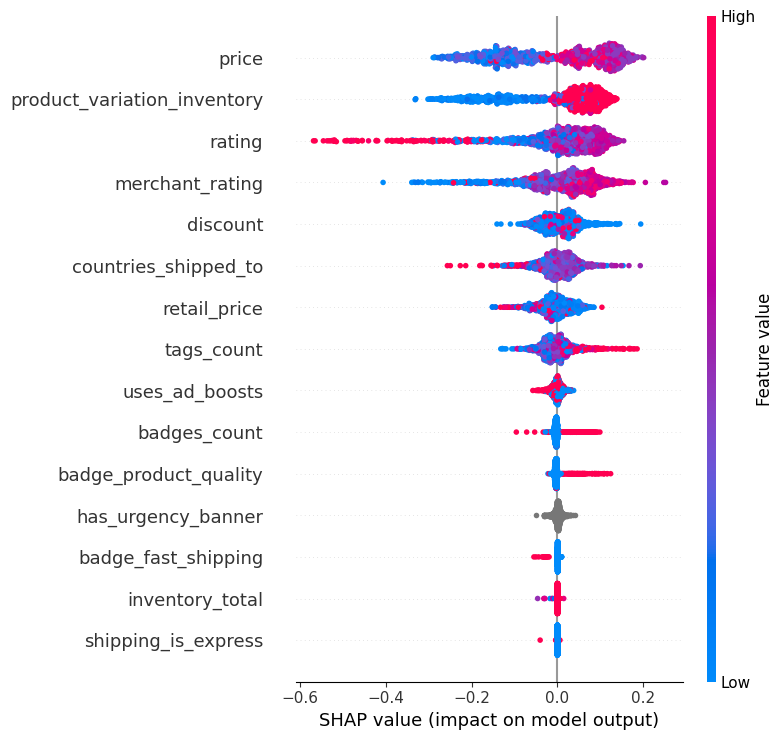

In [ ]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(x)

shap_values_class1 = shap_values[:, :, 1]

shap.summary_plot(shap_values_class1, x)

# 4.0 Conclusões

1° - Gerir bem os clientes cadastrados, pois quando melhor os mesmos avaliam nossos produtos, mas eles vendem, logo gera mais receita!

2° - Não iremos trabalhar com produtos com valores muitos baixos, pois eles não impactam diretamente nas vendas e geram volume em estoque que não são aproveitados.

3° - Focar em produtos de Tickets Médios, de €8 para cima, sempre prezando pela qualidade do produto e da qualidade da entrega!